In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
data = pd.read_csv("Titanic-Dataset.csv")

In [237]:
print(data.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [238]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [239]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [240]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [241]:
mean_age = np.mean(data['Age'])
mean_fare = np.mean(data['Fare'])

print("Mean Age:", mean_age)

data['Age'] = data['Age'].fillna(mean_age)

#Confirm no missing ages remain after filling
print("Missing Ages:", data['Age'].isnull().sum())

Mean Age: 29.69911764705882
Missing Ages: 0


In [242]:
most_common_port = data['Embarked'].value_counts().idxmax()
print("Most Common Port:", most_common_port)

data['Embarked'] = data['Embarked'].fillna(most_common_port)

print("Missing Embarked values:", data['Embarked'].isnull().sum())

Most Common Port: S
Missing Embarked values: 0


In [243]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [244]:
total_passengers = len(data)

print("Total Passengers:", total_passengers)
print("Average Age:", round(mean_age,2))
print("Average Fare:", round(mean_fare, 2))

Total Passengers: 891
Average Age: 29.7
Average Fare: 32.2


In [245]:
avg_fare_survived = data[data['Survived'] == 1]['Fare'].mean()
avg_fare_not_survived = data[data['Survived'] == 0]['Fare'].mean()

print("Survived Avg Fare:", round(avg_fare_survived,2))
print("Not Survived Avg Fare:", round(avg_fare_not_survived,2))

Survived Avg Fare: 48.4
Not Survived Avg Fare: 22.12


In [246]:
gender_counts = data['Sex'].value_counts()

print("Number of Males:", gender_counts['male'])
print("Number of Females:", gender_counts['female'])

Number of Males: 577
Number of Females: 314


In [247]:
survival_counts = data['Survived'].value_counts()

print(survival_counts)
print("Survived:", survival_counts[1])
print("Did Not Survive:", survival_counts[0])

Survived
0    549
1    342
Name: count, dtype: int64
Survived: 342
Did Not Survive: 549


In [248]:
survived_count = data['Survived'].sum()
unsurvived_count = total_passengers - survived_count

#For Percentage%
survived_per = (survived_count / total_passengers) * 100
unsurvived_per = (unsurvived_count / total_passengers) * 100

print(f"Survived Percentage: {survived_per:.2f}%")
print(f"Not Survived Percentage: {unsurvived_per:.2f}%")

Survived Percentage: 38.38%
Not Survived Percentage: 61.62%


In [249]:
survival_by_class = data.groupby("Pclass")["Survived"].mean() * 100
best_class = survival_by_class.idxmax()
best_rate = survival_by_class.max()

print("Survival Rate by Passenger Class:")
print(survival_by_class.round(2))

Survival Rate by Passenger Class:
Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64


In [250]:
print(f"Highest survival: Class {best_class} ({best_rate:.2f}%)")

Highest survival: Class 1 (62.96%)


In [251]:
#Function for age group
def age_group(age):
    if age <= 12:
        return "Child"
    elif age <= 19:
        return "Teen"
    elif age <= 40:
        return "Adult"
    else:
        return "Senior"

data["AgeGroup"] = data["Age"].apply(age_group)

survival_by_age_group = data.groupby("AgeGroup")["Survived"].mean() * 100

print("Survival by Age Group:")
print(survival_by_age_group)

Survival by Age Group:
AgeGroup
Adult     36.048527
Child     57.971014
Senior    36.666667
Teen      41.052632
Name: Survived, dtype: float64


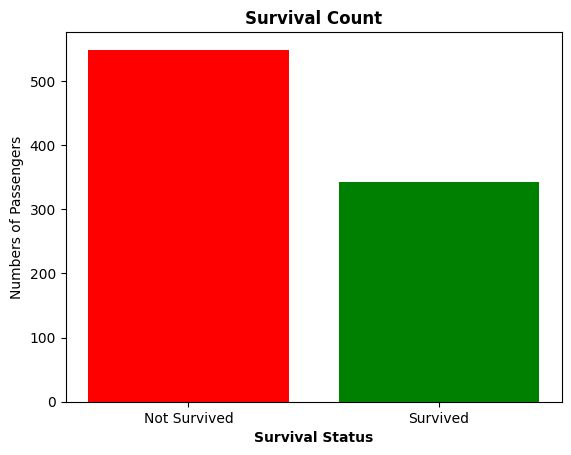

In [252]:
#bar Plot for Survival Counts
plt.bar(survival_counts.index, survival_counts.values, color=['red', 'green'])
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel("Survival Status", fontweight='bold')
plt.ylabel("Numbers of Passengers")
plt.title("Survival Count", fontweight='bold')
plt.show()

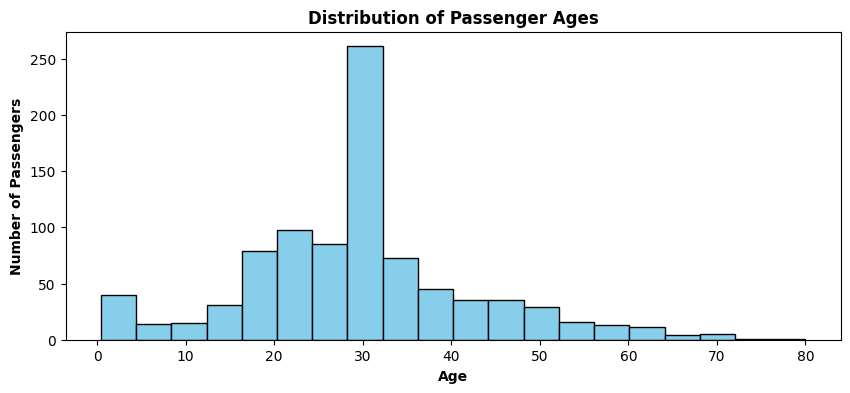

In [253]:
#histogram plot for Passengers Ages
plt.figure(figsize=(10,4))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Age", fontweight='bold')
plt.ylabel("Number of Passengers", fontweight='bold')
plt.title("Distribution of Passenger Ages", fontweight='bold')
plt.show()

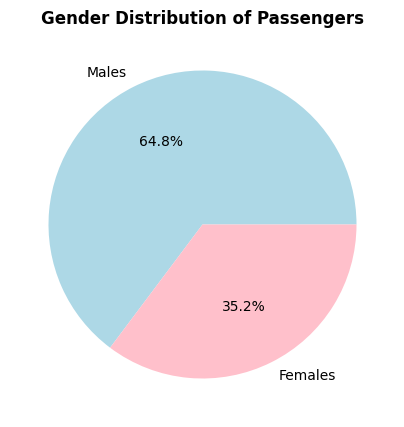

In [254]:
#Pie Chart for Gender
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=['Males', 'Females'], autopct='%1.1f%%', colors=['lightblue','pink'])
plt.title("Gender Distribution of Passengers", fontweight='bold')
plt.show()

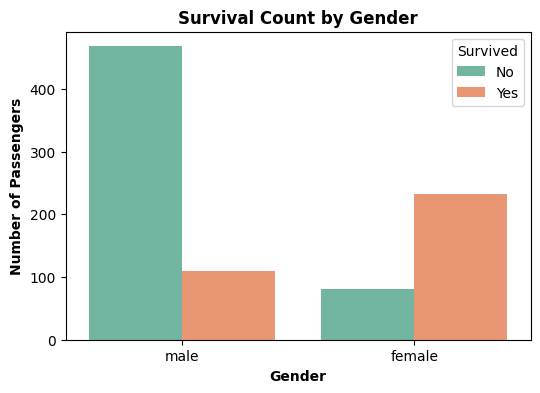

In [255]:
#Survived by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Sex', hue='Survived',palette='Set2')
plt.xlabel("Gender", fontweight='bold')
plt.ylabel("Number of Passengers", fontweight='bold')
plt.title("Survival Count by Gender", fontweight='bold')
plt.legend(title='Survived', labels=['No','Yes'])
plt.show()

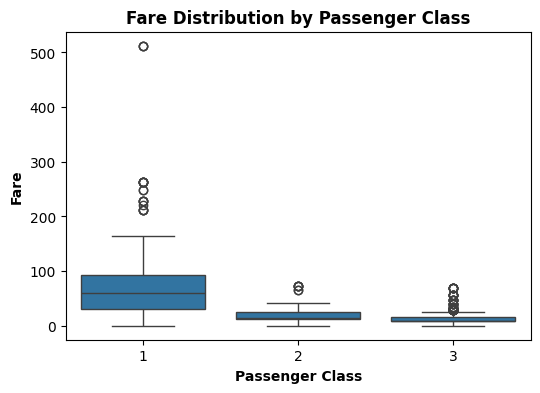

In [256]:
#Boxplot for Fare by Pclass
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='Pclass', y='Fare')
plt.xlabel("Passenger Class", fontweight='bold')
plt.ylabel("Fare", fontweight='bold')
plt.title("Fare Distribution by Passenger Class", fontweight='bold')
plt.show()

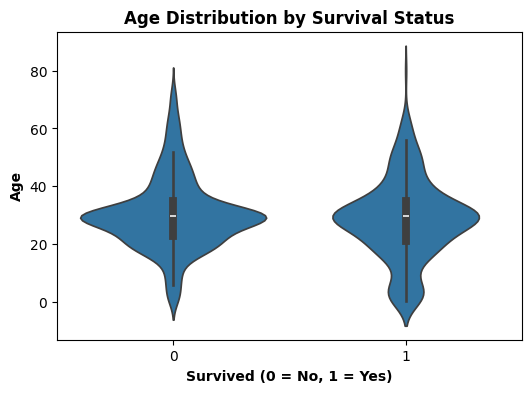

In [257]:
#Violinplot for Age by Survived
plt.figure(figsize=(6,4))
sns.violinplot(data=data, x='Survived', y='Age')
plt.xlabel("Survived (0 = No, 1 = Yes)", fontweight='bold')
plt.ylabel("Age", fontweight='bold')
plt.title("Age Distribution by Survival Status", fontweight='bold')
plt.show()

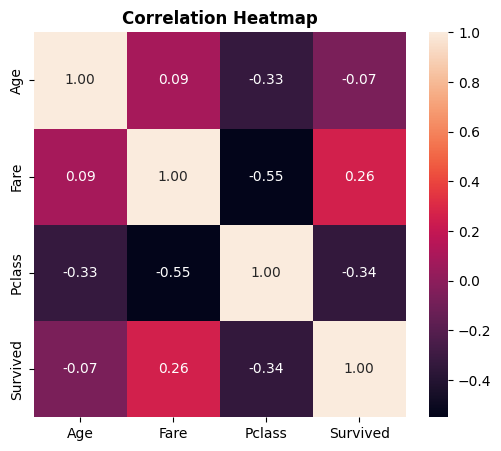

In [258]:
num_cols = ['Age', 'Fare', 'Pclass', 'Survived']
num_data = data[num_cols]

corr = num_data.corr() 
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap", fontweight='bold')
plt.show()

In [259]:
#Empirical Probability
P_survived_EP = survived_count / total_passengers
print(" Empirical Probability of Survival:", round(P_survived_EP, 2),
      "and its percentage is:", round(P_survived_EP * 100, 2))

 Empirical Probability of Survival: 0.38 and its percentage is: 38.38


In [260]:
surviving_females = data[data['Sex']=='female']['Survived'].sum()
total_females = gender_counts['female']

P_female_survived_EP = surviving_females / total_females

print(f"Empirical Probability of Female Survival: {round(P_female_survived_EP, 2)}, "
      f"and its percentage is: {round(P_female_survived_EP*100, 2)}%")


Empirical Probability of Female Survival: 0.74, and its percentage is: 74.2%


In [261]:
surviving_males = data[data['Sex']=='male']['Survived'].sum()
total_males = gender_counts['male']

P_male_survived_EP = surviving_males / total_males

print(f"Empirical Probability of Male Survival: {round(P_male_survived_EP, 2)}, "
      f"and its percentage is: {round(P_male_survived_EP*100, 2)}%")


Empirical Probability of Male Survival: 0.19, and its percentage is: 18.89%


In [262]:
#Survival probability by class
Pclass_prob = data.groupby('Pclass')['Survived'].mean()

for i in range(len(Pclass_prob)):
    cls = Pclass_prob.index[i]   # class number
    prob = Pclass_prob.iloc[i]   # probability value
    print(f"Class {cls} Survival Probability: {round(prob,2)}, Percentage: {round(prob*100,2)}%")

Class 1 Survival Probability: 0.63, Percentage: 62.96%
Class 2 Survival Probability: 0.47, Percentage: 47.28%
Class 3 Survival Probability: 0.24, Percentage: 24.24%


In [263]:
#Theoretical probability:
favorable_outcomes = 1
total_outcomes = 2

P_survived_TP = favorable_outcomes / total_outcomes
P_survived_Male_TP = favorable_outcomes / total_outcomes
P_survived_Female_TP = favorable_outcomes / total_outcomes 

print("Theoretical Probability of Surviving:", P_survived_TP)
print("Theoretical Probability of Male Surviving:", P_survived_TP)
print("Theoretical Probability of Female Surviving:", P_survived_TP)

Theoretical Probability of Surviving: 0.5
Theoretical Probability of Male Surviving: 0.5
Theoretical Probability of Female Surviving: 0.5


In [264]:
total_classes = 3
favorable_class = 1

P_class_survived_TP = favorable_class / total_classes

print("Theoretical Probability of Surviving for a class:", round(P_class_survived_TP,2))
print("Percentage:", round(P_class_survived_TP * 100, 2), "%")

Theoretical Probability of Surviving for a class: 0.33
Percentage: 33.33 %


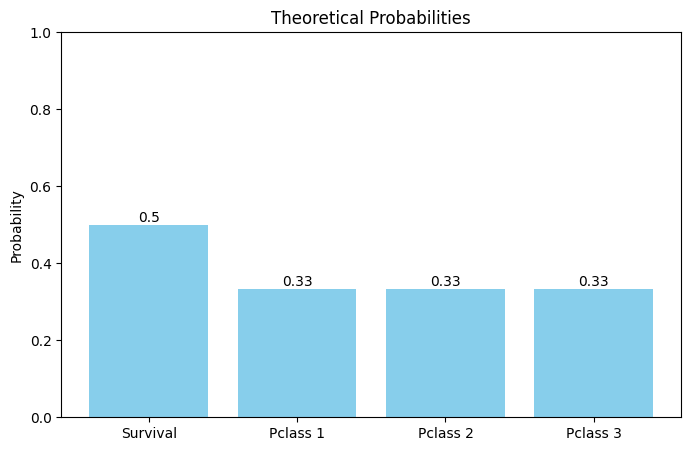

In [265]:
categories = ['Survival', 'Pclass 1', 'Pclass 2', 'Pclass 3']
probabilities = [P_survived_TP, P_class_survived_TP, P_class_survived_TP, P_class_survived_TP]

plt.figure(figsize=(8,5))
bars = plt.bar(categories, probabilities, color='skyblue')
plt.ylim(0,1)
plt.title("Theoretical Probabilities")
plt.ylabel("Probability")
plt.bar_label(bars, labels=[f"{round(p,2)}" for p in probabilities])
plt.show()

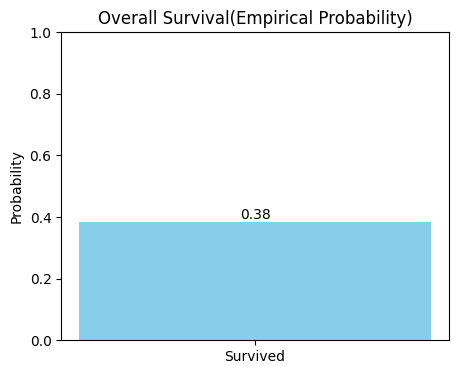

In [266]:
categories_overall = ['Survived']
probabilities_overall = [P_survived_EP]

#Survival Empirical Probability
plt.figure(figsize=(5,4))
bars = plt.bar(categories_overall, probabilities_overall, color='skyblue')
plt.bar_label(bars, labels=[f"{round(p,2)}" for p in probabilities_overall])
plt.ylim(0,1)
plt.title("Overall Survival(Empirical Probability)")
plt.ylabel("Probability")
plt.show()

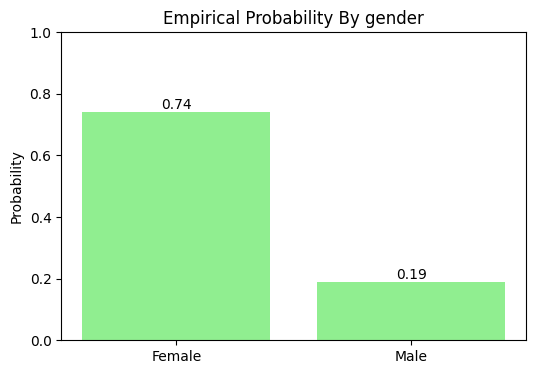

In [267]:
#Gender survival Empirical probability
categories_gender = ['Female', 'Male']
probabilities_gender = [P_female_survived_EP, P_male_survived_EP]

plt.figure(figsize=(6,4))
bars = plt.bar(categories_gender, probabilities_gender, color='lightgreen')
plt.bar_label(bars, labels=[f"{round(p,2)}" for p in probabilities_gender])
plt.ylim(0,1)
plt.title("Empirical Probability By gender")
plt.ylabel("Probability")
plt.show()

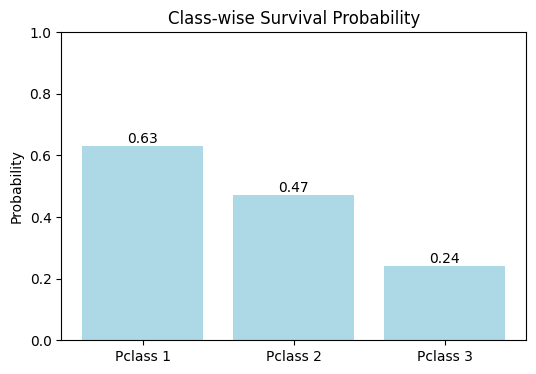

In [268]:
#Empirical probability by class
categories_class = ['Pclass 1', 'Pclass 2', 'Pclass 3']
probabilities_class = [Pclass_prob[1], Pclass_prob[2], Pclass_prob[3]]

plt.figure(figsize=(6,4))
bars = plt.bar(categories_class, probabilities_class, color='lightblue')
plt.bar_label(bars, labels=[f"{round(p,2)}" for p in probabilities_class])
plt.ylim(0,1)
plt.title("Class-wise Survival Probability")
plt.ylabel("Probability")
plt.show()

In [269]:
#Empirical vs Theoretical Probability

comparison = pd.DataFrame({
    "Empirical": [
        P_survived_EP, 
        P_female_survived_EP, 
        P_male_survived_EP, 
        Pclass_prob[1], 
        Pclass_prob[2], 
        Pclass_prob[3]
    ],
    "Theoretical": [
        P_survived_TP,          # overall survival
        P_survived_Male_TP,          # female survival
        P_survived_Female_TP,          # male survival
        P_class_survived_TP,    # class 1 survival
        P_class_survived_TP,    # class 2 survival
        P_class_survived_TP     # class 3 survival
    ]
}, index=["Overall Survival", "Female Survival", "Male Survival", "1st Class", "2nd Class", "3rd Class"])

print("Comparison of Empirical vs Theoretical Probabilities:\n")
print(comparison.round(2))

Comparison of Empirical vs Theoretical Probabilities:

                  Empirical  Theoretical
Overall Survival       0.38         0.50
Female Survival        0.74         0.50
Male Survival          0.19         0.50
1st Class              0.63         0.33
2nd Class              0.47         0.33
3rd Class              0.24         0.33


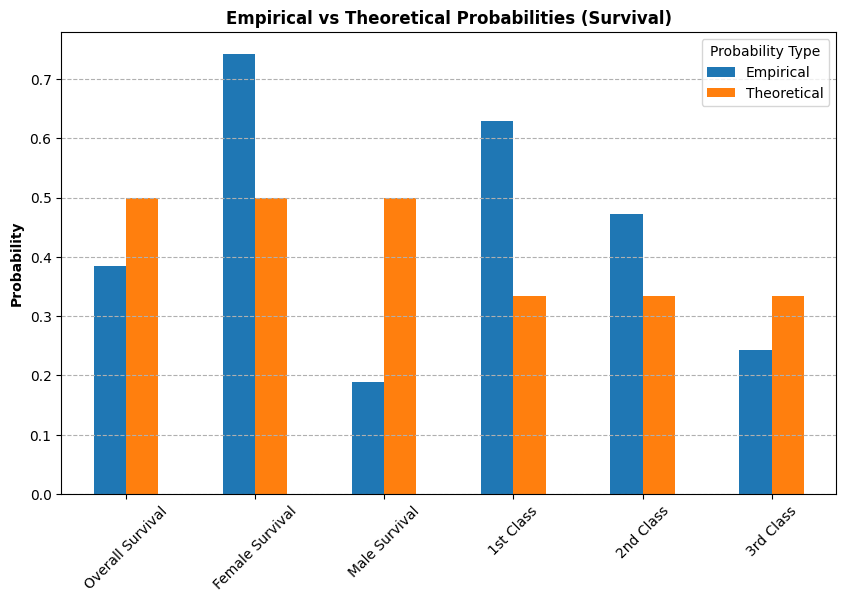

In [270]:
#plot for comparison between Empirical and theoritical probabilities
comparison.plot(kind="bar", figsize=(10,6))
plt.title("Empirical vs Theoretical Probabilities (Survival)", fontweight = 'bold')
plt.ylabel("Probability", fontweight = 'bold')
plt.xticks(rotation=45)
plt.legend(title="Probability Type")
plt.grid(axis="y", linestyle="--")
plt.show()

# Titanic Survival – Short Questions/Answers

## q1 Did women survive at a higher rate than men?

## Ans: Yes. Women had higher survival rates. 
    survived: Women = (74%) vs Men = (19%).

## q2 Which class had the best survival chance?

## Ans: 1st Class had the highest survival chance.  
    survived: 1st Class = (63%), 2nd = (47%), 3rd = (24%).

## q3 Did age play a role in survival?

## Ans: Yes. Children had the highest survival (58%),  
    while Teens (41%), Adults (36%), and Seniors (37%).

## q4 Was Fare (ticket price) related to survival?

## Ans: Yes.  
    Survived Avg Fare = (48.4), Not Survived = (22.1).

## q5 How do empirical probabilities differ from theoretical probabilities?

## Ans: Empirical is based on actual data, Theoretical is based on assumptions.  
    Titanic Survival: Empirical ≈ (38.4%), Theoretical ≈ (50%).
    
  



In [1]:
print("SAAD")

SAAD
